<a href="https://colab.research.google.com/github/Goodnight77/NLP_workshop/blob/main/nlp_gdsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import spacy
import string
import warnings

warnings.filterwarnings('ignore')

In [3]:
!pip install gdown

In [23]:
import gdown
#train_csv = https://drive.google.com/file/d/1UvHz8MCx57lqEnpy3rgnjP_KvyGGenHF/view?usp=sharing
#test_csv = https://drive.google.com/file/d/1hlo6KlbDGT2bj6wzQDvF7JGwA9nLJeKF/view?usp=sharing

train_url = 'https://drive.google.com/uc?id=1UvHz8MCx57lqEnpy3rgnjP_KvyGGenHF'
test_url = 'https://drive.google.com/uc?id=1hlo6KlbDGT2bj6wzQDvF7JGwA9nLJeKF'

gdown.download(train_url, "twitter_training.csv", quiet=False)
gdown.download(test_url,"twitter_validation.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1UvHz8MCx57lqEnpy3rgnjP_KvyGGenHF
To: /content/twitter_training.csv
100%|██████████| 10.3M/10.3M [00:00<00:00, 167MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hlo6KlbDGT2bj6wzQDvF7JGwA9nLJeKF
To: /content/twitter_validation.csv
100%|██████████| 164k/164k [00:00<00:00, 53.1MB/s]


'twitter_validation.csv'

In [24]:
train_data=pd.read_csv("twitter_training.csv",names=["Tweet_ID","entity","sentiment","Tweet_content"])
test_data=pd.read_csv("twitter_validation.csv",names=["Tweet_ID","entity","sentiment","Tweet_content"])
train_data

Tweet_ID       entity sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                           Tweet_content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [25]:
train_data.columns

Index(['Tweet_ID', 'entity', 'sentiment', 'Tweet_content'], dtype='object')

In [86]:
df=pd.concat([train_data,test_data],axis=0)

In [87]:
df1=df.copy()
df2=df.copy()

In [28]:
import seaborn as sns
sns.countplot(data=df, x='sentiment');

In [29]:
df['Tweet_content'] = df['Tweet_content'].astype(str)

In [30]:
df2['tweet_length'] = df['Tweet_content'].apply(lambda x: len(x))
df2

Tweet_ID               entity   sentiment  \
0        2401          Borderlands    Positive   
1        2401          Borderlands    Positive   
2        2401          Borderlands    Positive   
3        2401          Borderlands    Positive   
4        2401          Borderlands    Positive   
..        ...                  ...         ...   
995      4891  GrandTheftAuto(GTA)  Irrelevant   
996      4359                CS-GO  Irrelevant   
997      2652          Borderlands    Positive   
998      8069            Microsoft    Positive   
999      6960      johnson&johnson     Neutral   

                                         Tweet_content  tweet_length  
0    im getting on borderlands and i will murder yo...            53  
1    I am coming to the borders and I will kill you...            51  
2    im getting on borderlands and i will kill you ...            50  
3    im coming on borderlands and i will murder you...            51  
4    im getting on borderlands 2 and i will murder ...            57  
..                                                 ...           ...  
995  ⭐️ Toronto is the arts and culture capital of ...           281  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...           248  
997  Today sucked so it’s time to drink wine n play...           120  
998  Bought a fraction of Microsoft today. Small wins.            49  
999  Johnson & Johnson to stop selling talc baby po...           116  

[75682 rows x 5 columns]

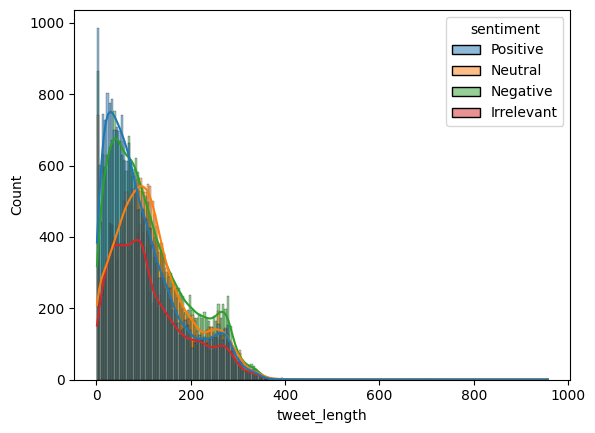

In [ ]:
sns.histplot(data=df2, x='tweet_length', hue='sentiment', kde=True);

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer().fit(df['Tweet_content'])
vect = vectorizer.transform(df['Tweet_content'])
vect


<75682x31584 sparse matrix of type '<class 'numpy.float64'>'
	with 1233056 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.vocabulary_

In [41]:
df.isnull().sum()

Tweet_ID         0
entity           0
sentiment        0
Tweet_content    0
dtype: int64

In [35]:
df.duplicated().sum()

3217

In [88]:
for i in df.columns:
  print(i,"has",df[i].nunique(),"unique values")

Tweet_ID has 12447 unique values
entity has 32 unique values
sentiment has 4 unique values
Tweet_content has 69974 unique values


In [38]:
df['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [39]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [40]:
df.dtypes

Tweet_ID          int64
entity           object
sentiment        object
Tweet_content    object
dtype: object

### Dropping the null values

In [89]:
df = df.dropna(axis=0, how='any')

In [90]:
df.isnull().sum()

Tweet_ID         0
entity           0
sentiment        0
Tweet_content    0
dtype: int64

###  Dropping the duplicate values

In [91]:
df.duplicated().sum()

2857

In [92]:
df.drop_duplicates(inplace=True)

In [93]:
df.duplicated().sum()


0

## TEXT PRE-PROCESSING

### Lower Casing

In [94]:
text= "HELLO My name IS AHMed AND You ?"
lower_text= text.lower()
lower_text

'hello my name is ahmed and you ?'

In [95]:
df['Tweet_content'].head()

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Tweet_content, dtype: object

In [96]:
df["Tweet_content"] = df["Tweet_content"].str.lower()

### Removal of HTML Tags

In [97]:
 ## Remove html tags
import re
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'', text)


In [98]:
text= "<head><title> This is </title></head><body><h1>how the text </h1><p>looks like </p><p>when removing HTML tags.</p>"
text =remove_html_tags(text)
text

' This is how the text looks like when removing HTML tags.'

In [99]:
df['Tweet_content']=df['Tweet_content'].apply(remove_html_tags)

### Removal of URLs

In [102]:
##remove url
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'', text)

In [103]:
text= "The official website of OpenAI is https://openai.com"
text=remove_url(text)
text

'The official website of OpenAI is '

In [104]:
df['Tweet_content']=df['Tweet_content'].apply(remove_url)

### Removal of Punctuations ( !”#$%&’()*+,-./:;<=>?@[\]^_{|}~‘ )


In [105]:
import string,time
string.punctuation
exclude = string.punctuation
def remove_punc(text):
  for char in exclude:
    text = text.replace(char,'')
  return text

In [109]:
text= "@aasle[]ma~a!! lab;'e@s.s 3&l%%-^i{k c?h*#na)7we+lk"
remove_punc(text)

'aaslemaa labess 3lik chna7welk'

In [110]:
df['Tweet_content']=df['Tweet_content'].apply(remove_punc)

### Chat Words Conversion

In [132]:
chat_words = {
"AFAIK": "As Far As I Know",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "I Love You",
"IMHO": "In My Honest/Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My A** Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The A**",
"PRT": "Party",
"PRW": "Parents Are Watching",
"QPSA?": "Que Pasa?",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My A** Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U": "You",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The F***",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait...",
"7K": "Sick:-D Laughter",
"TFW": "That Feeling When",
"MFW": "My Face When",
"MRW": "My Reaction When",
"IFYP": "I Feel Your Pain",
"TNTL": "Trying Not To Laugh",
"JK": "Just Kidding",
"IDC": "I Don't Care",
"ILY": "I Love You",
"IMU": "I Miss You",
"ADIH": "Another Day In Hell",
"ZZZ": "Sleeping, Bored, Tired",
"WYWH": "Wish You Were Here",
"TIME": "Tears In My Eyes",
"BAE": "Before Anyone Else",
"FIMH": "Forever In My Heart",
"BSAAW": "Big Smile And A Wink",
"BWL": "Bursting With Laughter",
"BFF": "Best Friends Forever",
"CSL": "Can't Stop Laughing"
}

In [159]:
def chat_conversion(text):
  new_text = []
  for w in text.split():
    if w.upper() in chat_words:
      new_text.append(chat_words[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

In [160]:
text="Hello i ll BRB , BTW did you see that hilarious meme? LOL. It made me ROFL"
text=chat_conversion(text)
text

'Hello i ll Be Right Back , By The Way did you see that hilarious meme? LOL. It made me Rolling On The Floor Laughing'

In [161]:
df['Tweet_content']=df['Tweet_content'].apply(chat_conversion)

###  Removal of Emojis

In [162]:
import re
def remove_emoji(text):
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F" # emoticons
    u"\U0001F300-\U0001F5FF" # symbols & pictographs
    u"\U0001F680-\U0001F6FF" # transport & map symbols
    u"\U0001F1E0-\U0001F1FF" # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)


In [163]:
df['Tweet_content']=df['Tweet_content'].apply(remove_emoji)

###  Spelling Correction

In [164]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 15.5 MB/s eta 0:00:00


In [165]:
from textblob import TextBlob
def correct_spellings(text):
  textBlb = TextBlob(text)
  correct_text=textBlb.correct().string
  return correct_text


In [166]:
from spellchecker import SpellChecker
spell = SpellChecker()
def correct_spelling(text):
  corrected_text = []
  misspelled_words = spell.unknown(text.split())
  for word in text.split():
    if word in misspelled_words:
      corrected_text.append(spell.correction(word))
    else:
      corrected_text.append(word)
  return " ".join(corrected_text)

In [179]:
text = "whuut is yoiur namme "
correct_spellings(text)

'what is your name '

###  Removal of stopwords

In [182]:
!pip install nltk

In [183]:
import nltk
from nltk.corpus import stopwords

In [184]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [185]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [186]:
def remove_stopwords(text):
  new_text = []
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x = new_text[:]
  new_text.clear()
  return " ".join(x)


In [196]:
text= "Their own cat walked through the park after it had rained , but it stopped under the tree"
remove_stopwords(text)

'Their  cat walked   park    rained ,   stopped   tree'

In [190]:
test_data['Tweet_content']=test_data['Tweet_content'].apply(remove_stopwords)

### Removal of Frequent words

In [193]:
from collections import Counter
cnt = Counter()
for text in test_data["Tweet_content"].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(15)

[('I', 321),
 ('game', 79),
 ('like', 73),
 ('The', 69),
 ('get', 58),
 ('Johnson', 58),
 ('2', 57),
 ('&', 51),
 ('This', 46),
 ("I'm", 42),
 ('-', 41),
 ('love', 41),
 ('one', 41),
 ('play', 36),
 ('good', 33)]

In [197]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
  """custom function to remove the frequent words"""
  return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [198]:
df['Tweet_content'] = df['Tweet_content'].apply(lambda text:remove_freqwords(text))
df.head()

Tweet_ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet_content  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands and i will murder yo...

###  Removal of Rare words

In [199]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
  """custom function to remove the rare words"""
  return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df['Tweet_content'] = df['Tweet_content'].apply(lambda text: remove_rarewords(text))
df.head()

Tweet_ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet_content  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands and i will murder yo...

### removal of Emoticons

In [200]:
EMOTICONS = {
u":‑\)":"Happy face or smiley",
u":\)":"Happy face or smiley",
u":-\]":"Happy face or smiley",
u":\]":"Happy face or smiley",
u":-3":"Happy face smiley",
u":3":"Happy face smiley",
u":->":"Happy face smiley",
u":>":"Happy face smiley",
u"8-\)":"Happy face smiley",
u":o\)":"Happy face smiley",
u":-\}":"Happy face smiley",
u":\}":"Happy face smiley",
u":-\)":"Happy face smiley",
u":c\)":"Happy face smiley",
u":\^\)":"Happy face smiley",
u"=\]":"Happy face smiley",
u"=\)":"Happy face smiley",
u":‑D":"Laughing, big grin or laugh with glasses",
u":D":"Laughing, big grin or laugh with glasses",
u"8‑D":"Laughing, big grin or laugh with glasses",
u"8D":"Laughing, big grin or laugh with glasses",
u"X‑D":"Laughing, big grin or laugh with glasses",
u"XD":"Laughing, big grin or laugh with glasses",
u"=D":"Laughing, big grin or laugh with glasses",
u"=3":"Laughing, big grin or laugh with glasses",
u"B\^D":"Laughing, big grin or laugh with glasses",
u":-\)\)":"Very happy",
u":‑\(":"Frown, sad, andry or pouting",
u":-\(":"Frown, sad, andry or pouting",
u":\(":"Frown, sad, andry or pouting",
u":‑c":"Frown, sad, andry or pouting",
u":c":"Frown, sad, andry or pouting",
u":‑<":"Frown, sad, andry or pouting",
u":<":"Frown, sad, andry or pouting",
u":‑\[":"Frown, sad, andry or pouting",
u":\[":"Frown, sad, andry or pouting",
u":-\|\|":"Frown, sad, andry or pouting",
u">:\[":"Frown, sad, andry or pouting",
u":\{":"Frown, sad, andry or pouting",
u":@":"Frown, sad, andry or pouting",
u">:\(":"Frown, sad, andry or pouting",
u":'‑\(":"Crying",
u":'\(":"Crying",
u":'‑\)":"Tears of happiness",
u":'\)":"Tears of happiness",
u"D‑':":"Horror",
u"D:<":"Disgust",
u"D:":"Sadness",
u"D8":"Great dismay",
u"D;":"Great dismay",
u"D=":"Great dismay",
u"DX":"Great dismay",
u":‑O":"Surprise",
u":O":"Surprise",
u":‑o":"Surprise",
u":o":"Surprise",
u":-0":"Shock",
u"8‑0":"Yawn",
u">:O":"Yawn",
u":-\*":"Kiss",
u":\*":"Kiss",
u":X":"Kiss",
u";‑\)":"Wink or smirk",
u";\)":"Wink or smirk",
u"\*-\)":"Wink or smirk",
u"\*\)":"Wink or smirk",
u";‑\]":"Wink or smirk",
u";\]":"Wink or smirk",
u";\^\)":"Wink or smirk",
u":‑,":"Wink or smirk",
u";D":"Wink or smirk",
u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
u":‑\|":"Straight face",
u":\|":"Straight face",
u":$":"Embarrassed or blushing",
u":‑x":"Sealed lips or wearing braces or tongue-tied",
u":‑#":"Sealed lips or wearing braces or tongue-tied",
u":#":"Sealed lips or wearing braces or tongue-tied",
u":‑&":"Sealed lips or wearing braces or tongue-tied",
u":&":"Sealed lips or wearing braces or tongue-tied",
u"O:‑\)":"Angel, saint or innocent",
u"O:\)":"Angel, saint or innocent",
u"0:‑3":"Angel, saint or innocent",
u"0:3":"Angel, saint or innocent",
u"0:‑\)":"Angel, saint or innocent",
u"0:\)":"Angel, saint or innocent",
u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
u"0;\^\)":"Angel, saint or innocent",
u">:‑\)":"Evil or devilish",
u">:\)":"Evil or devilish",
u"\}:‑\)":"Evil or devilish",
u"\}:\)":"Evil or devilish",
u"3:‑\)":"Evil or devilish",
u"3:\)":"Evil or devilish",
u">;\)":"Evil or devilish",
u"\|;‑\)":"Cool",
u"\|‑O":"Bored",
u":‑J":"Tongue-in-cheek",
u"#‑\)":"Party all night",
u"%‑\)":"Drunk or confused",
u"%\)":"Drunk or confused",
u":-###..":"Being sick",
u":###..":"Being sick",
u"<:‑\|":"Dump",
u"\(>_<\)":"Troubled",
u"\(>_<\)>":"Troubled",
u"\(';'\)":"Baby",
u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
u"\('_'\)":"Sad or Crying",
u"\(/_;\)":"Sad or Crying",
u"\(T_T\) \(;_;\)":"Sad or Crying",
u"\(;_;":"Sad of Crying",
u"\(;_:\)":"Sad or Crying",
u"\(;O;\)":"Sad or Crying",
u"\(:_;\)":"Sad or Crying",
u"\(ToT\)":"Sad or Crying",
u";_;":"Sad or Crying",
u";-;":"Sad or Crying",
u";n;":"Sad or Crying",
u";;":"Sad or Crying",
u"Q\.Q":"Sad or Crying",
u"T\.T":"Sad or Crying",
u"QQ":"Sad or Crying",
u"Q_Q":"Sad or Crying",
u"\(-\.-\)":"Shame",
u"\(-_-\)":"Shame",
u"\(=_=\)":"Tired",
u"\(=\^\·\^=\)":"cat",
u"\(=\^\·\·\^=\)":"cat",
u"=_\^= ":"cat",
u"\(\.\.\)":"Looking down",
u"\(\._\.\)":"Looking down",
u"\^m\^":"Giggling with hand covering mouth",
u"\(ToT\)/~~~":"Waving",
u"\(\*\^0\^\*\)":"Excited",
u"\(\*_\*\)":"Amazed",
u"\(\*_\*;":"Amazed",
u"\(\+_\+\) \(@_@\)":"Amazed",
u"\(\*\^\^\)v":"Laughing,Cheerful",
u"\(\^_\^\)v":"Laughing,Cheerful",
u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
u'\(-"-\)':"Worried",
u"\(\^0_0\^\)":"Eyeglasses",
u"\(o\.o\)":"Surprised",
u"oO":"Surprised"
}

In [201]:
def remove_emoticons(text):
  emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
  return emoticon_pattern.sub(r'', text)


In [202]:
df['Tweet_content']=df['Tweet_content'].apply(remove_emoticons)

###  Conversion of Emoticon to Words

In [203]:
def convert_emoticons(text):
  for emot in EMOTICONS:
    text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
  return text

### Stemming

In [204]:
from nltk.stem.porter import PorterStemmer

In [205]:
ps = PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [206]:
df['Tweet_content']=df['Tweet_content'].apply(stem_words)


In [ ]:
#before stemming
df1["Tweet_content"].head()

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Tweet_content, dtype: object

In [ ]:
#after stemming
df['Tweet_content'].head()

0         im get on borderland i will murder you all
1               i am come border i will kill you all
2           im get on borderland i will kill you all
3        im come on borderland i will murder you all
4    im get on borderland 2 i will murder you me all
Name: Tweet_content, dtype: object

### lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["Tweet_content"].apply(lambda text:lemmatize_words(text))
df.head()


Tweet_ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                     Tweet_content  \
0       im get on borderland i will murder you all   
1             i am come border i will kill you all   
2         im get on borderland i will kill you all   
3      im come on borderland i will murder you all   
4  im get on borderland 2 i will murder you me all   

                                   text_lemmatized  
0       im get on borderland i will murder you all  
1             i am come border i will kill you all  
2         im get on borderland i will kill you all  
3      im come on borderland i will murder you all  
4  im get on borderland 2 i will murder you me all

### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
nltk.download('punkt')
exemp1 = 'I am going to visit delhi!'
word_tokenize(exemp1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I', 'am', 'going', 'to', 'visit', 'delhi', '!']

In [ ]:
df["text_tokenized"] = df["Tweet_content"].apply(lambda text:word_tokenize(text))


In [ ]:
df["text_tokenized"].head()

0    [im, get, on, borderland, i, will, murder, you...
1       [i, am, come, border, i, will, kill, you, all]
2    [im, get, on, borderland, i, will, kill, you, ...
3    [im, come, on, borderland, i, will, murder, yo...
4    [im, get, on, borderland, 2, i, will, murder, ...
Name: text_tokenized, dtype: object

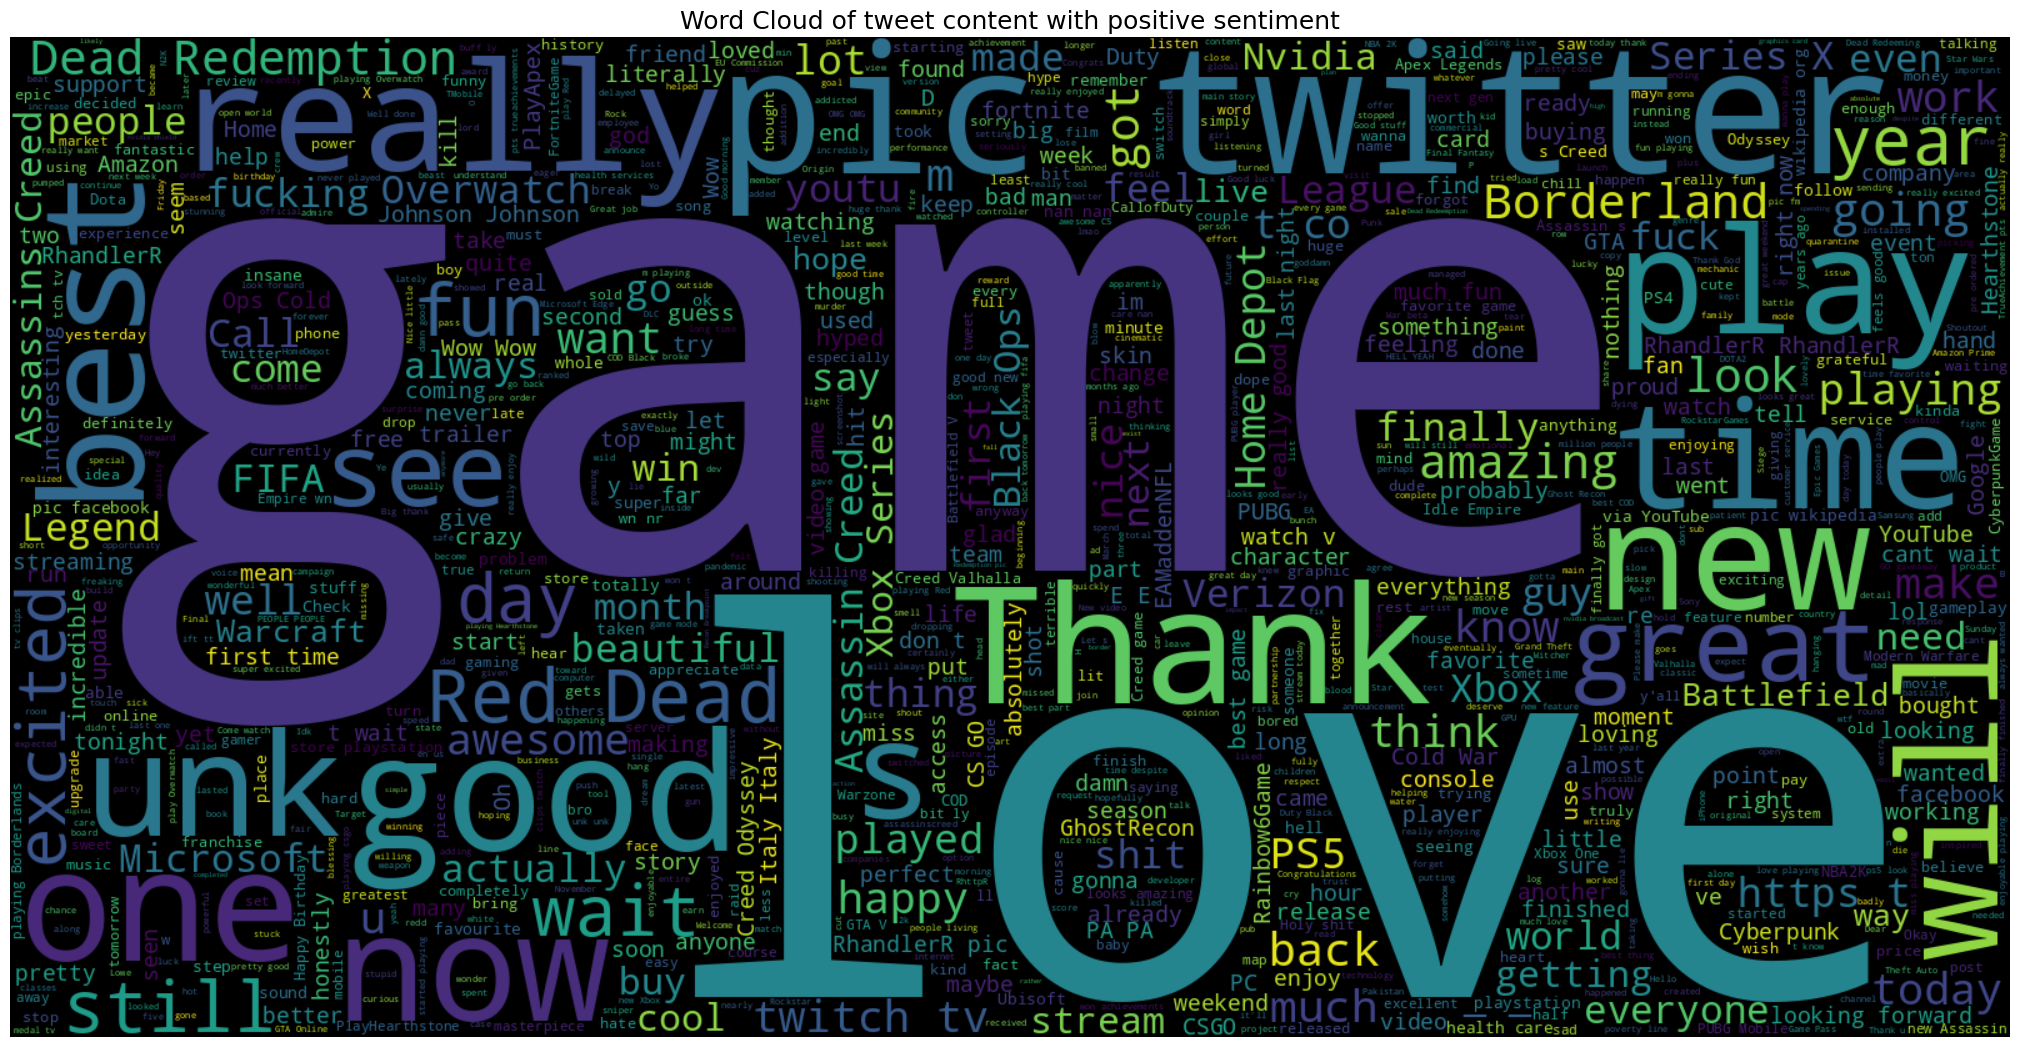

In [ ]:
train_data['Tweet_content'] = train_data['Tweet_content'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(train_data[train_data['sentiment'] == "Positive"].Tweet_content))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of tweet content with positive sentiment', size=18);

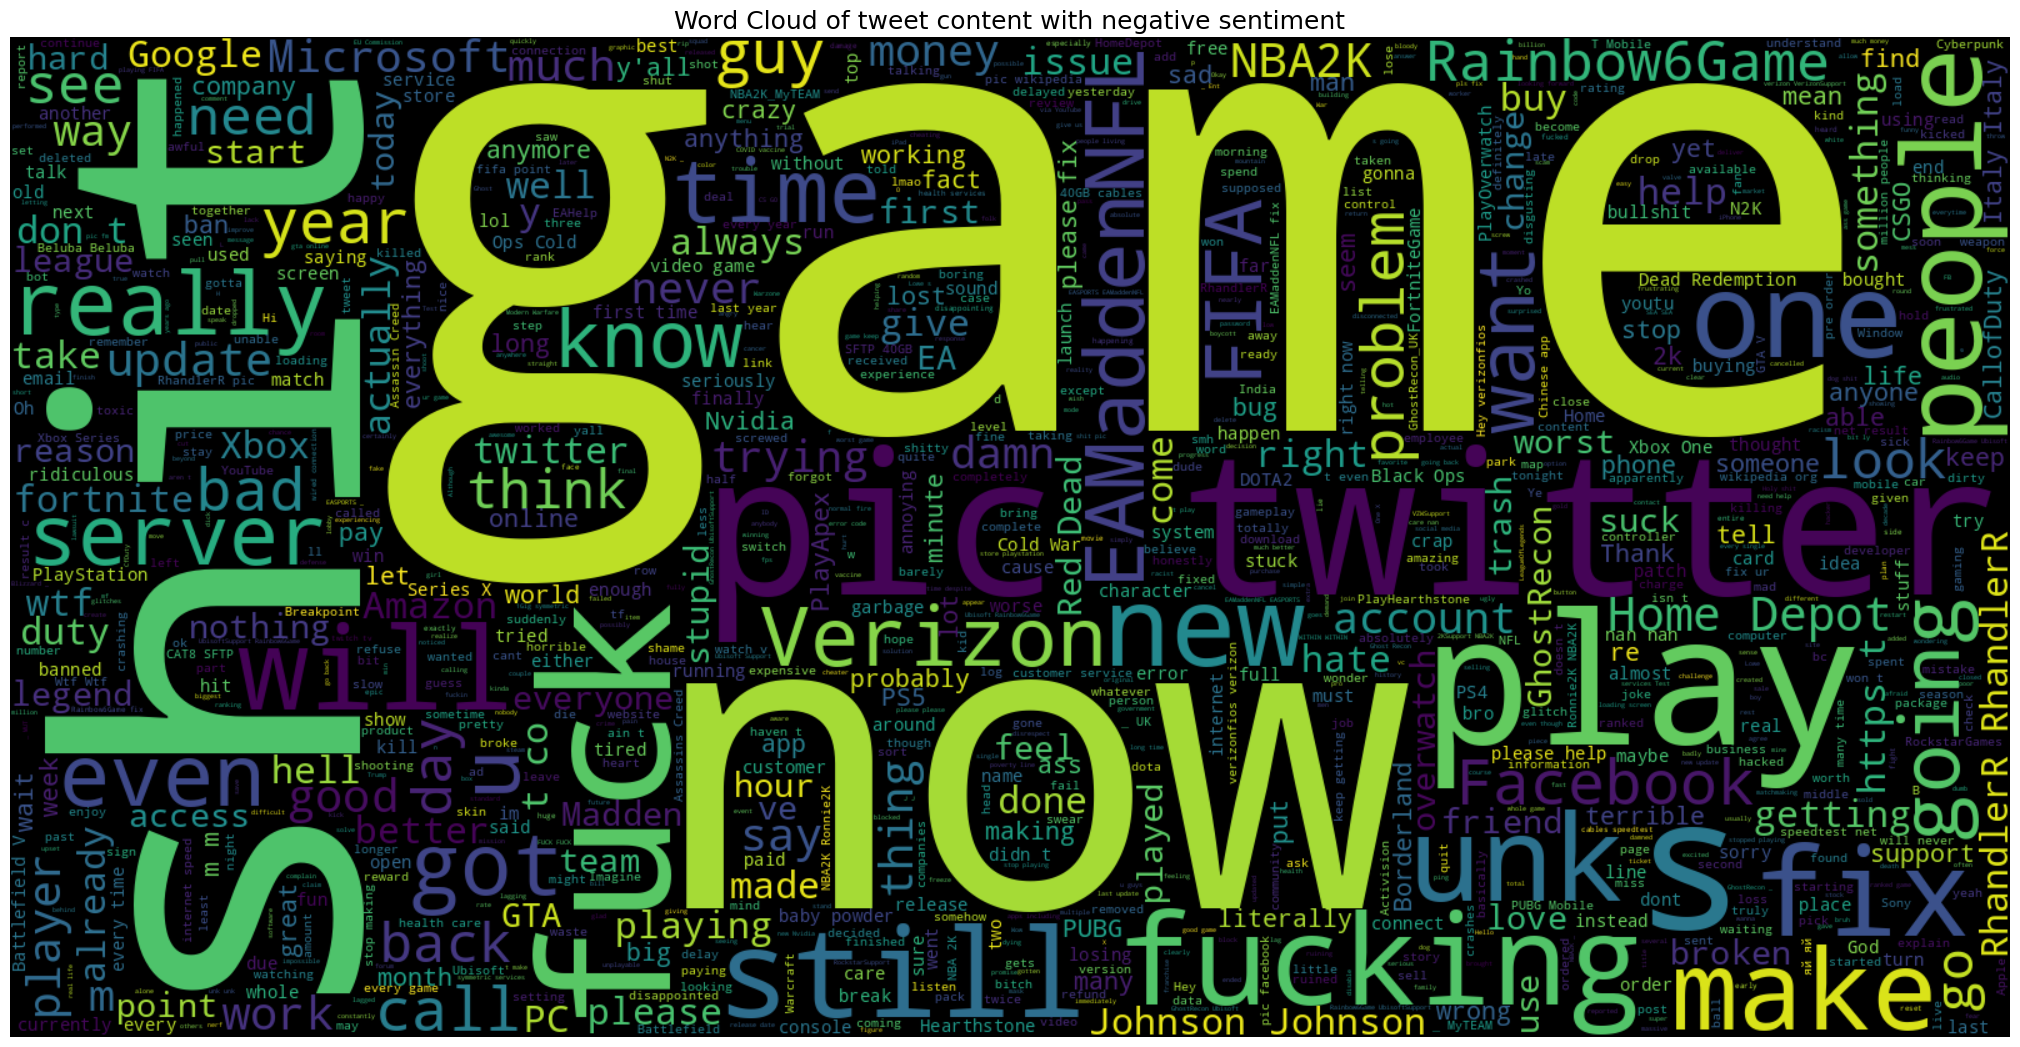

In [ ]:
train_data['Tweet_content'] = train_data['Tweet_content'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(train_data[train_data['sentiment'] == "Negative"].Tweet_content))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of tweet content with negative sentiment', size=18);